<a href="https://colab.research.google.com/github/Rejuvesh/EDA_PROJECT22BDS0267/blob/main/22BDS0267.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**REG NO:22BDS0267**
## **NAME:J REJUVESH**
## **BCSE331L - EDA Project**

In [5]:
#1.Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


## I began by importing the necessary Python libraries: pandas and numpy for data handling, matplotlib and seaborn for visualization. The Seaborn style was set to "whitegrid" with a pastel color palette for a clean look, and the default figure size was adjusted to make plots more readable.

In [6]:
#2.Load Dataset

file_path = "econmath.csv"
df = pd.read_csv(file_path)

## The dataset econmath.csv was loaded into a pandas DataFrame named df using pd.read_csv(). This allows to store and work with the data in a tabular format for analysis.

In [7]:
#3.Basic Exploration
# ===============================
print("Dimensions:", df.shape)
print("\n Column Names:", df.columns.tolist())
print("\n Data Types:\n", df.dtypes)
print("===== First 5 Rows =====")
print(df.head(), "\n")
print("\n Missing Values:\n", df.isnull().sum())
print("\n Summary Statistics:\n", df.describe())


Dimensions: (856, 18)

 Column Names: ['rownames', 'age', 'work', 'study', 'econhs', 'colgpa', 'hsgpa', 'acteng', 'actmth', 'act', 'mathscr', 'male', 'calculus', 'attexc', 'attgood', 'fathcoll', 'mothcoll', 'score']

 Data Types:
 rownames      int64
age           int64
work        float64
study       float64
econhs        int64
colgpa      float64
hsgpa       float64
acteng      float64
actmth      float64
act         float64
mathscr       int64
male          int64
calculus      int64
attexc        int64
attgood       int64
fathcoll      int64
mothcoll      int64
score       float64
dtype: object
===== First 5 Rows =====
   rownames  age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  \
0         1   23  15.0   10.0       0  3.4909  3.355    24.0    26.0  27.0   
1         2   23   0.0   22.5       1  2.1000  3.219    23.0    20.0  24.0   
2         3   21  25.0   12.0       0  3.0851  3.306    21.0    24.0  21.0   
3         4   22  30.0   40.0       0  2.6805  3.977    31

## I performed an initial exploration of the dataset by:

## Checking its dimensions (number of rows and columns).

## acteng, actmth, and act columns each have 42 missing values.

## No other columns have missing values.

## Viewing data types for each column.

## Displaying the first 5 rows to understand its structure.

## Generating summary statistics for numerical columns.

In [8]:
#4. Data Overview Table
overview = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Missing %": round(df.isnull().mean()*100, 2),
    "Unique Values": df.nunique()
})
print("===== Data Overview =====")
print(overview)

===== Data Overview =====
         Data Type  Missing Values  Missing %  Unique Values
rownames     int64               0       0.00            856
age          int64               0       0.00              9
work       float64               0       0.00             44
study      float64               0       0.00             52
econhs       int64               0       0.00              2
colgpa     float64               0       0.00            612
hsgpa      float64               0       0.00            531
acteng     float64              42       4.91             23
actmth     float64              42       4.91             23
act        float64              42       4.91             20
mathscr      int64               0       0.00             11
male         int64               0       0.00              2
calculus     int64               0       0.00              2
attexc       int64               0       0.00              2
attgood      int64               0       0.00              

##The Data Overview table summarizes key information for each column, including:

##Data Type (integer, float, etc.).

##Missing Values count and percentage.

##Unique Values count.

##**Most columns have no missing data, except acteng, actmth, and act, which have around 4.91% missing values each. This table helps in planning data cleaning steps.**

In [9]:
#5.Data Cleaning


df = df.drop_duplicates()

# Fill numeric NaNs with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\n Data cleaned. Remaining missing values:\n", df.isnull().sum())


 Data cleaned. Remaining missing values:
 rownames    0
age         0
work        0
study       0
econhs      0
colgpa      0
hsgpa       0
acteng      0
actmth      0
act         0
mathscr     0
male        0
calculus    0
attexc      0
attgood     0
fathcoll    0
mothcoll    0
score       0
dtype: int64


# All missing values have been successfully filled.
# No column contains NaN values after cleaning.
# Numeric columns were filled with their median.
# Non-numeric columns were filled with their most frequent value (mode).
# Duplicate rows were removed.

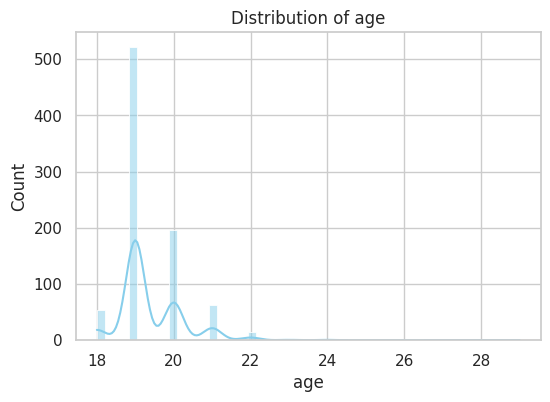

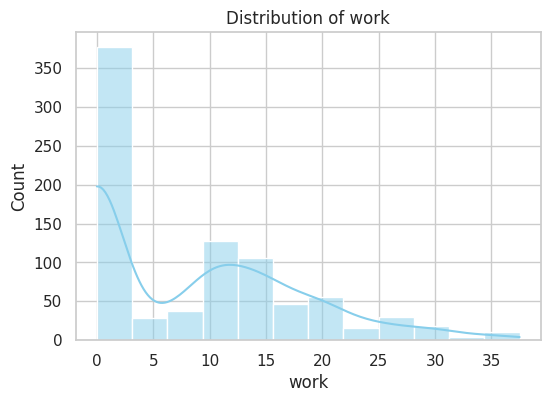

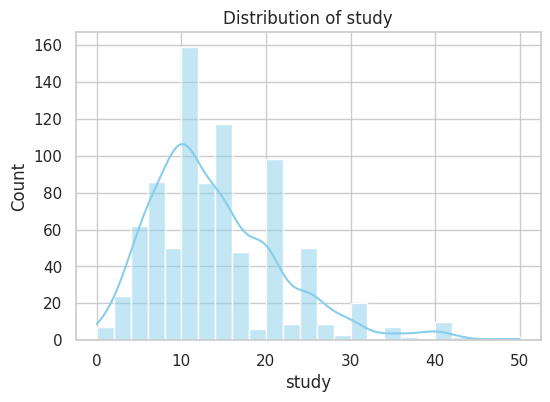

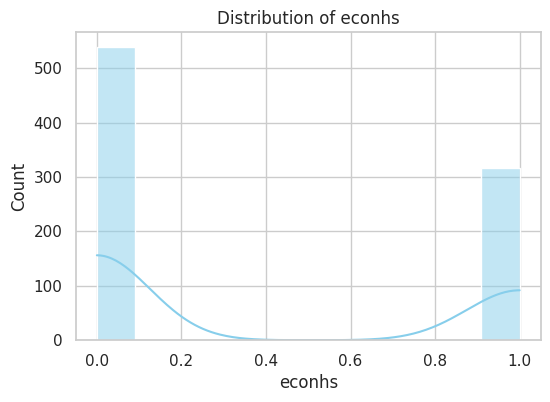

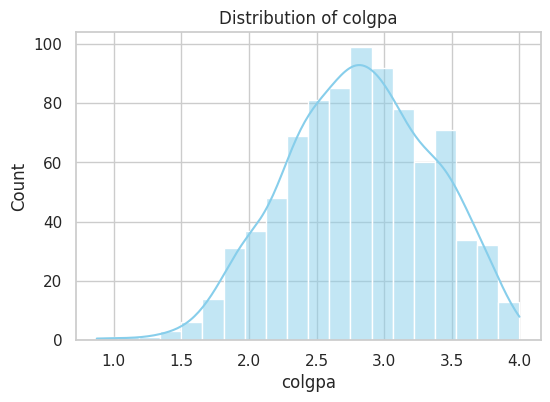

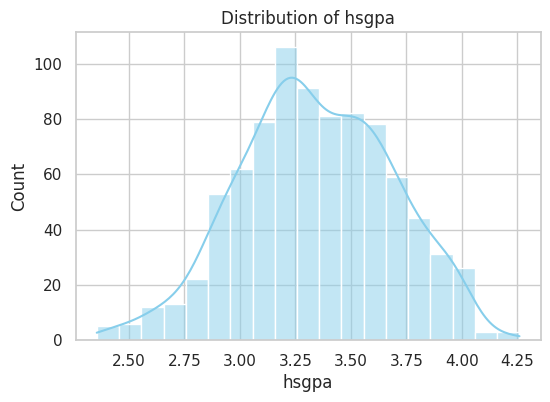

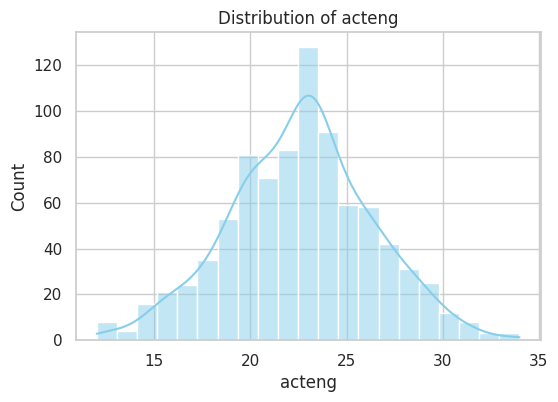

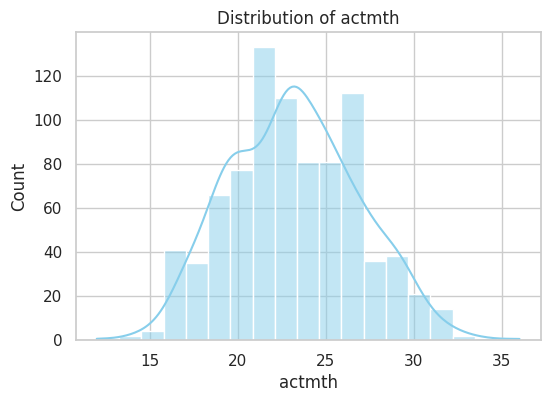

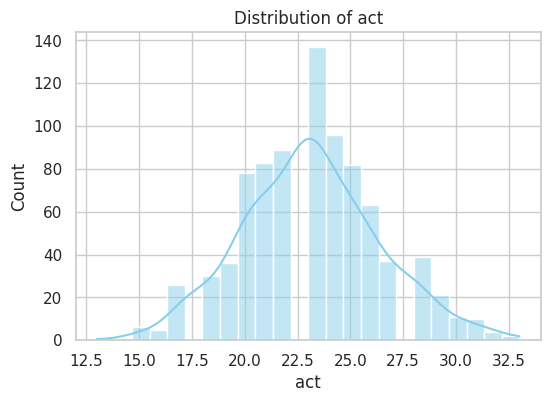

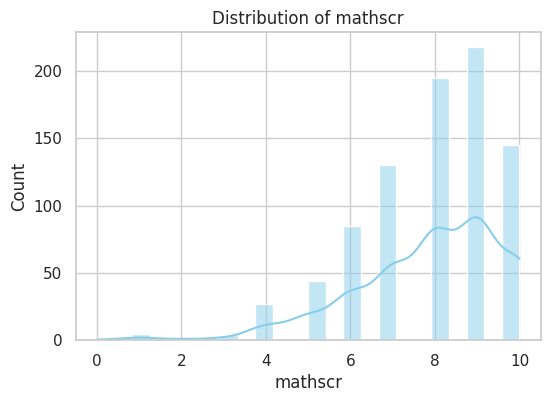

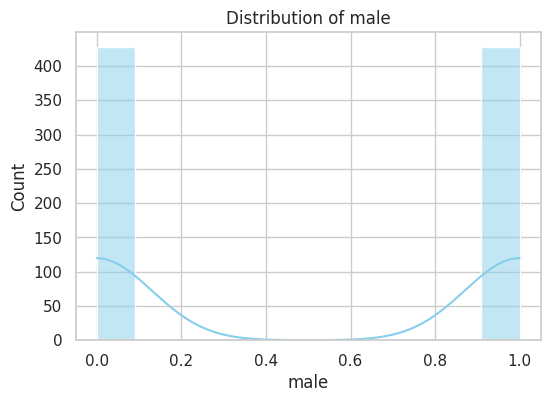

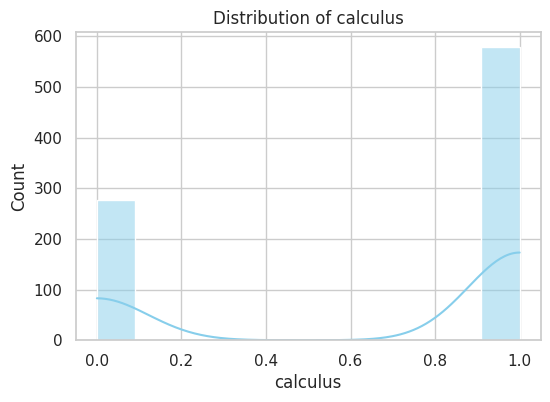

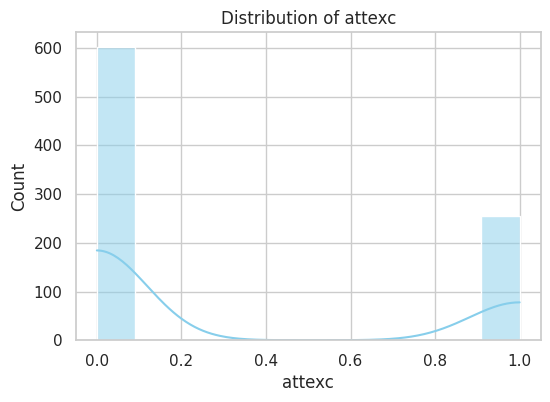

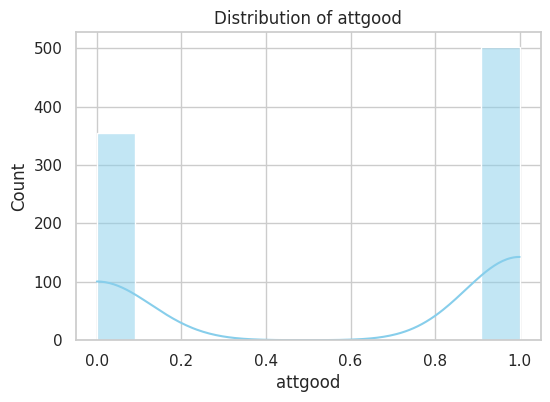

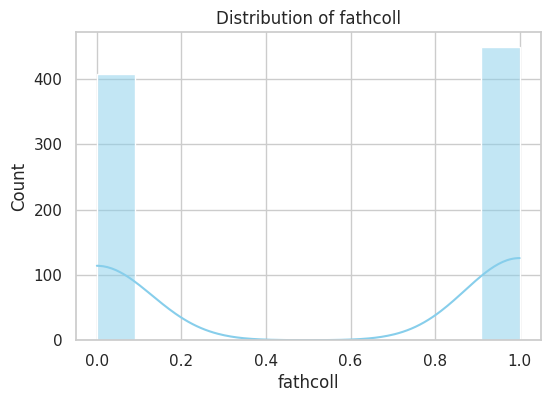

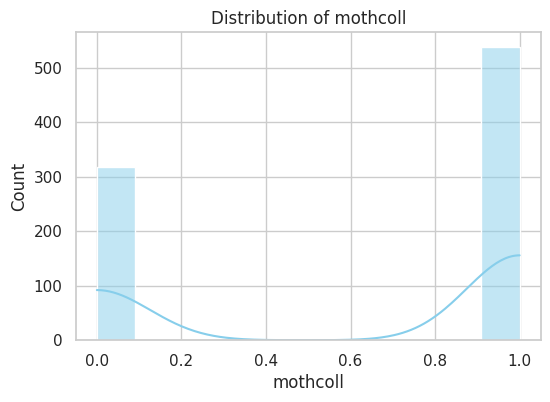

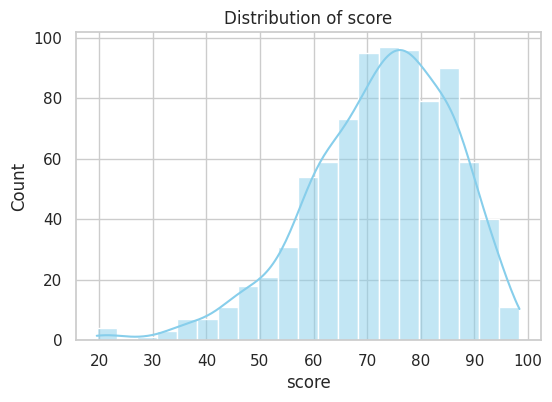

In [10]:
#6.Univariate Analysis
# ===============================
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()


id_like = ["rownames"]
num_cols = [col for col in num_cols if col not in id_like]

# Numerical features distribution
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical features countplot
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.show()




I examined each variable separately:

##**For numerical variables** (e.g., `age`, `work`, `study`), we use **histograms**.  
  - This shows how values are spread and helps identify patterns such as skewness or peaks.  
  - Example:  
    - `age` is concentrated between 18–21 years.  
    - `work` hours are mostly low, but a few students work more hours.  
    - `study` hours vary, with a peak around 10–15 hours.  

## **Categorical variables** use countplots to show frequency, but most columns here are numeric.

This helps spot common ranges, peaks, and outliers in the data.


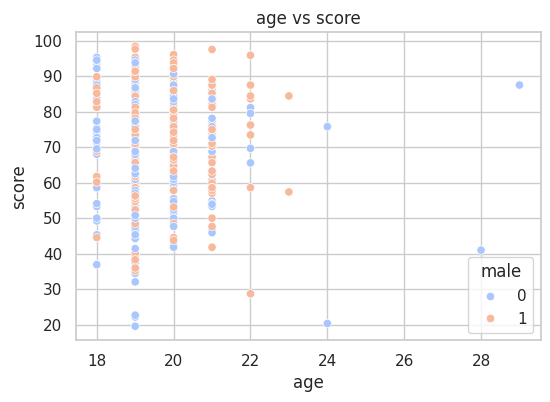

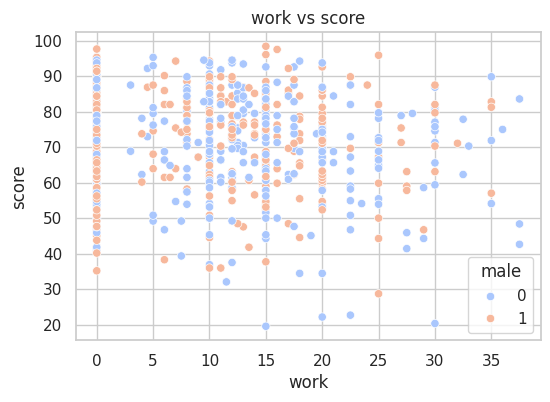

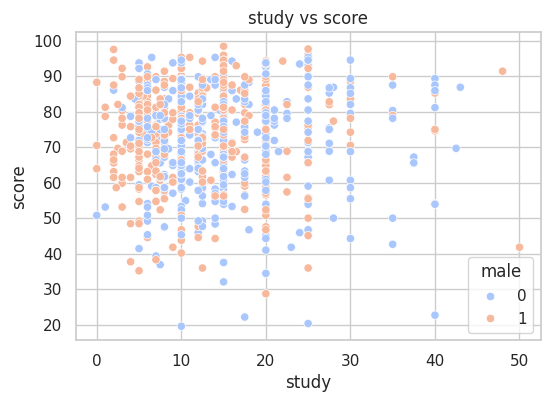

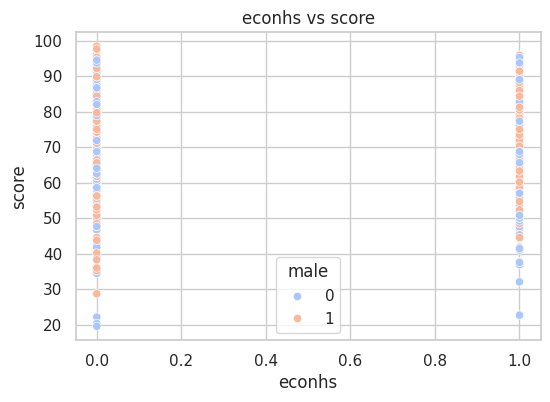

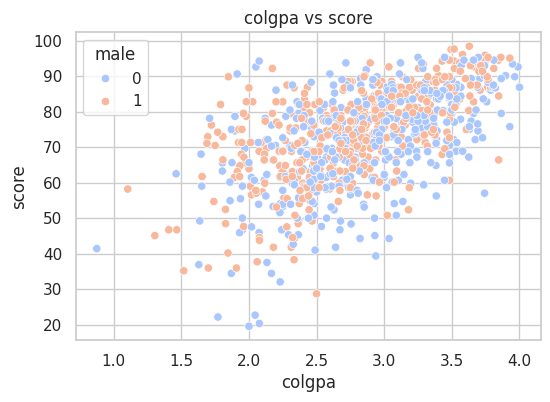

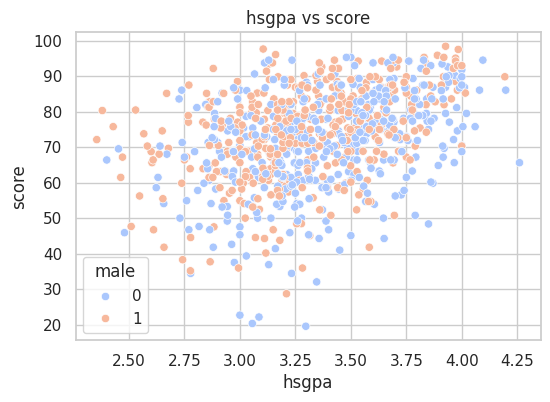

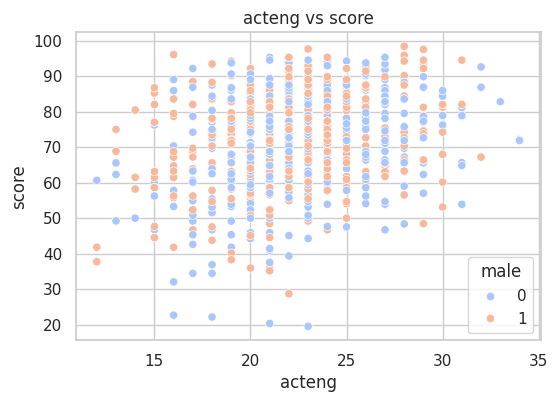

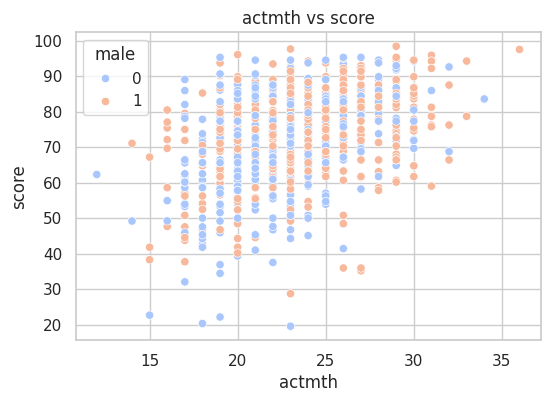

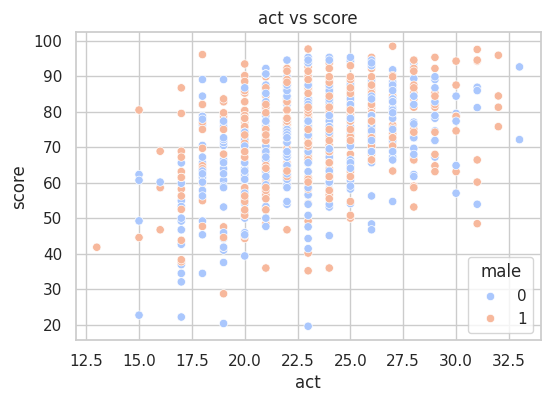

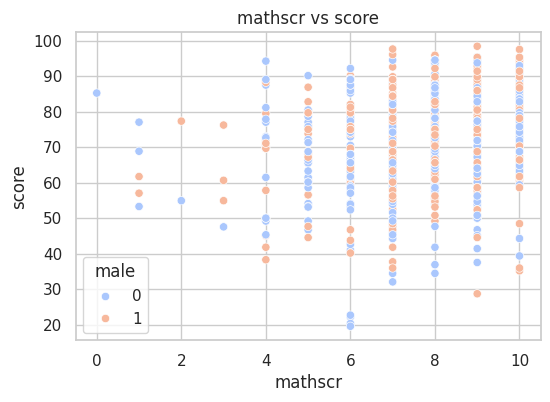

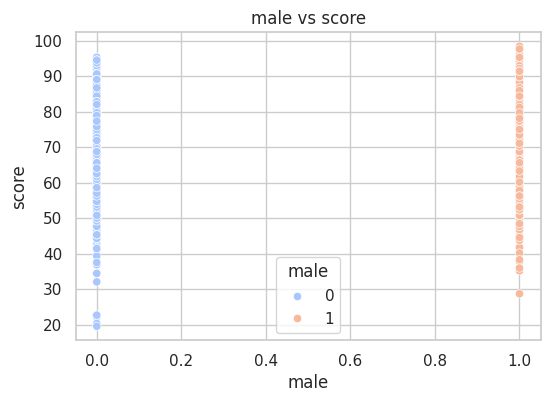

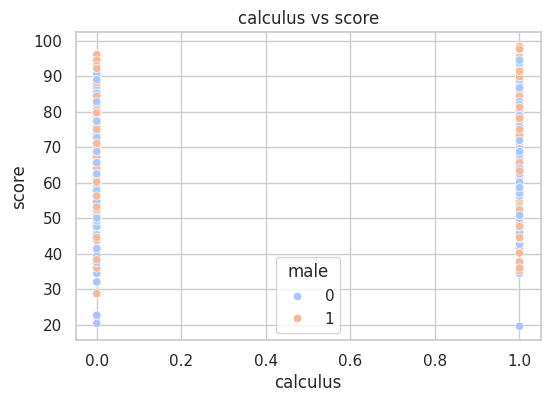

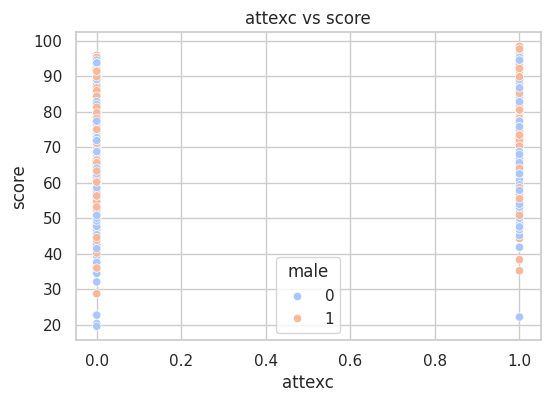

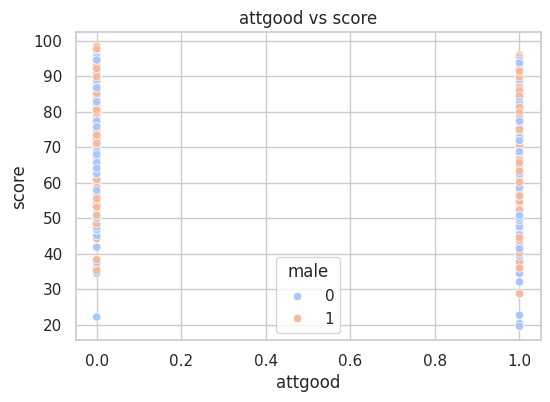

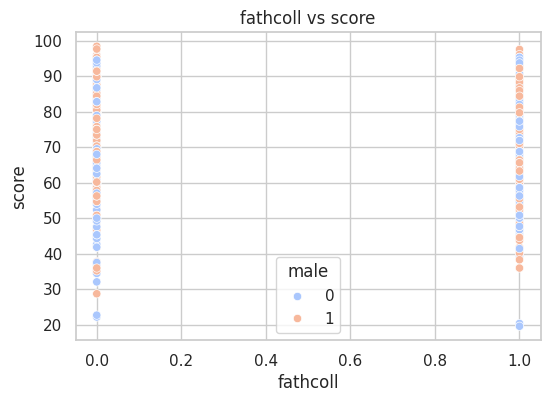

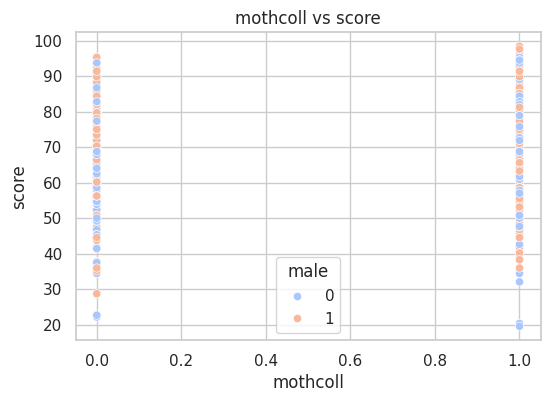

In [11]:
#7.Bivariate Analysis
# ===============================
# Scatterplots for numerical pairs with target 'score'
target = "score"
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target], hue=df["male"], palette="coolwarm")
        plt.title(f"{col} vs {target}")
        plt.show()

# Boxplots for categorical vs target
for col in cat_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], y=df[target], palette="Set3")
        plt.title(f"{col} vs {target}")
        plt.show()

## I examined the relationship between each variable and the target variable `score`:

- **Numerical vs Target** → Scatterplots show trends and patterns, with points colored by `male` for gender comparison.  
- **Categorical vs Target** → Boxplots compare the distribution of `score` across categories (if any exist).

This helps identify which factors may influence "score" and if there are visible group differences.


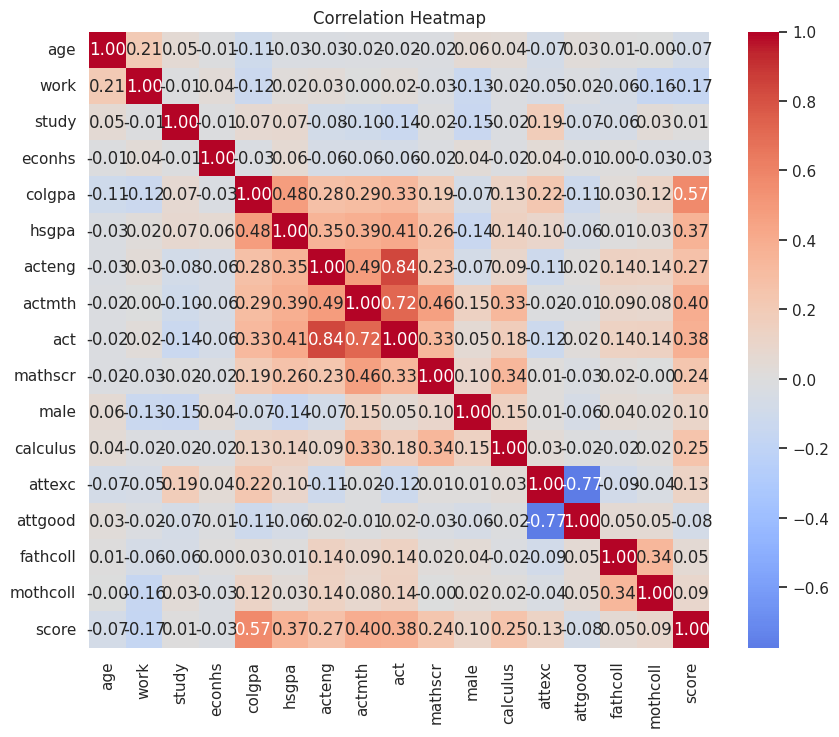

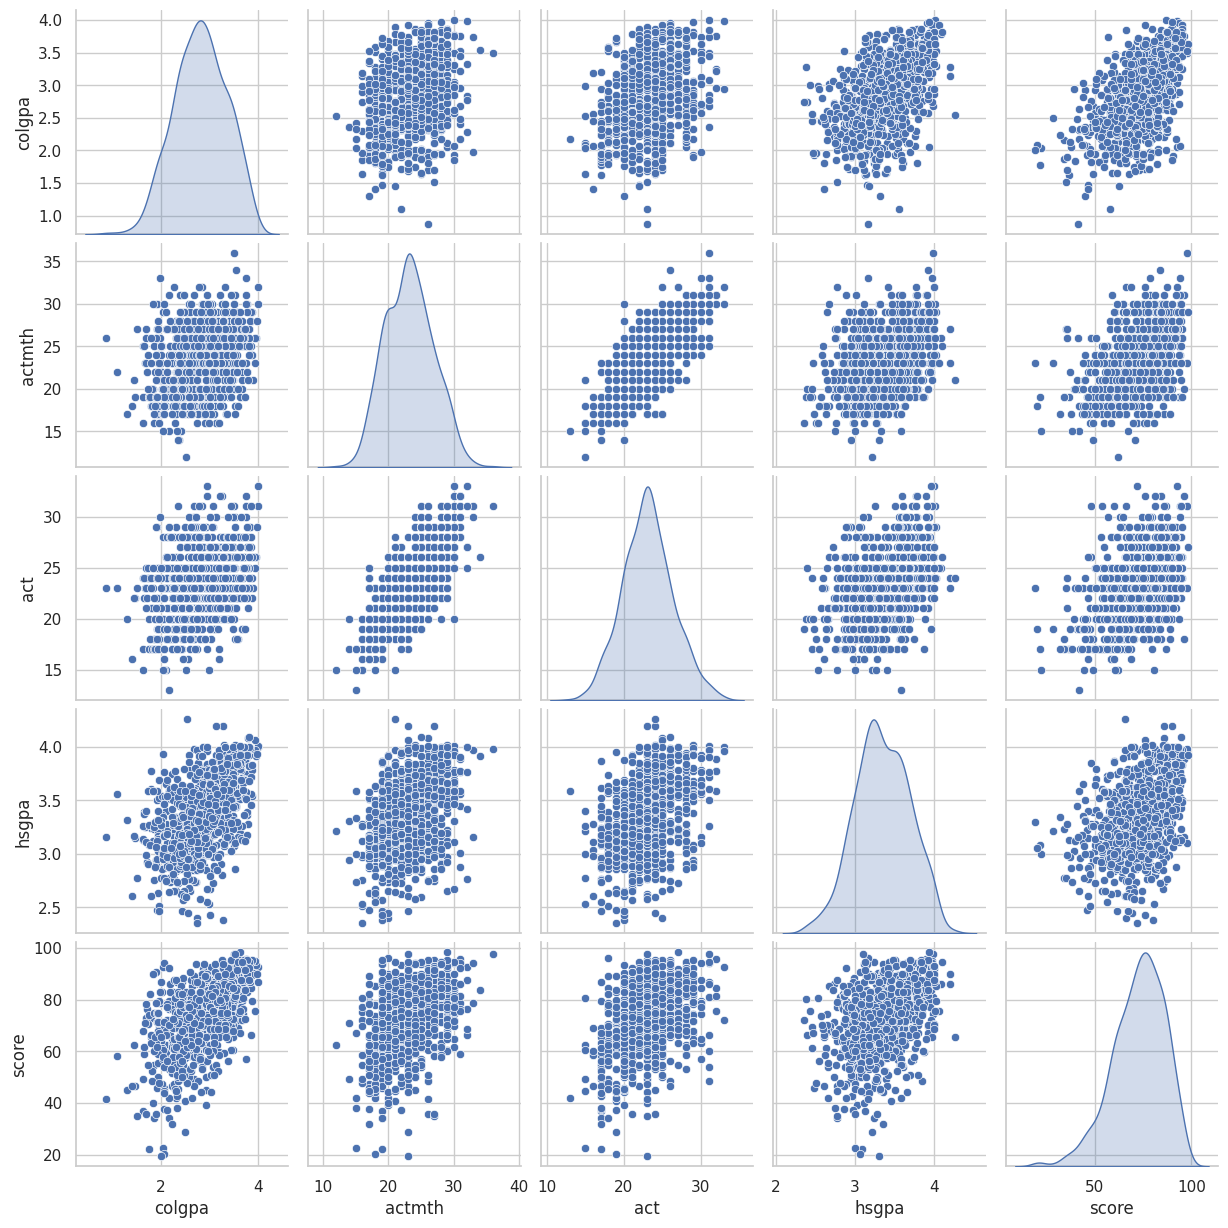

In [12]:
# Step 7: Multivariate Analysis

# Correlation Heatmap (numeric variables only)
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for top correlated features with 'score'
top_corr_features = corr[target].abs().sort_values(ascending=False)[1:5].index
sns.pairplot(df[top_corr_features.tolist() + [target]], diag_kind="kde")
plt.show()

- **Correlation Heatmap** : Shows the strength and direction of relationships between numerical variables.  
- **Pairplot** : Visualizes pairwise relationships for the top variables most correlated with `score`.

This step helps detect strong correlations, multicollinearity, and patterns involving multiple variables.

##**Phase 2: Module 4 & 5 BCSE331L Exploratory Data Analysis TH project**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [14]:
# Target variable
target = "score"


I selected **`score`** as the target variable for my analysis.  
This allowed me to study how various numerical and categorical attributes affect or relate to students' overall performance.


In [15]:
# Separate numerical and categorical
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

### Separating Numerical and Categorical Variables
I separated the dataset into **numerical columns** and **categorical columns**.  
This step is important because different types of analyses and visualizations are applied depending on the type of variable.  
 By dividing the dataset into these two groups, I was able to organize my analysis more effectively.


In [16]:
# Remove ID-like column
id_like = ["rownames"]
num_cols = [col for col in num_cols if col not in id_like]

### Removing ID-like Column
I removed the `rownames` column from the list of numerical variables.  
This column behaves like an identifier rather than a real feature, so keeping it in the analysis would not provide any meaningful insights.  
By excluding it, I ensured that my numerical analysis only focuses on variables that actually influence the target (`score`).


In [17]:
# 1. STATISTICAL SUMMARY MEASURES
# =========================================================

print("===== Skewness of Numerical Variables =====")
for col in num_cols:
    print(f"{col}: Skewness = {skew(df[col]):.2f}")

print("\n===== Quantiles (5%, 25%, 50%, 75%, 95%) =====")
for col in num_cols:
    print(f"\n{col}:")
    print(df[col].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

===== Skewness of Numerical Variables =====
age: Skewness = 3.07
work: Skewness = 0.77
study: Skewness = 1.14
econhs: Skewness = 0.54
colgpa: Skewness = -0.16
hsgpa: Skewness = -0.08
acteng: Skewness = -0.03
actmth: Skewness = 0.15
act: Skewness = 0.15
mathscr: Skewness = -1.02
male: Skewness = 0.00
calculus: Skewness = -0.75
attexc: Skewness = 0.89
attgood: Skewness = -0.35
fathcoll: Skewness = -0.10
mothcoll: Skewness = -0.53
score: Skewness = -0.70

===== Quantiles (5%, 25%, 50%, 75%, 95%) =====

age:
0.05    18.0
0.25    19.0
0.50    19.0
0.75    20.0
0.95    21.0
Name: age, dtype: float64

work:
0.05     0.0
0.25     0.0
0.50     8.0
0.75    15.0
0.95    25.0
Name: work, dtype: float64

study:
0.05     4.375
0.25     8.500
0.50    12.000
0.75    18.000
0.95    28.500
Name: study, dtype: float64

econhs:
0.05    0.0
0.25    0.0
0.50    0.0
0.75    1.0
0.95    1.0
Name: econhs, dtype: float64

colgpa:
0.05    1.929725
0.25    2.445900
0.50    2.812900
0.75    3.206900
0.95    3.6911

### 1D Analysis – Statistical Summary Measures

I calculated skewness for all the numerical variables.  
- I observed that variables like `age` (3.07) and `study` (1.14) are positively skewed, meaning their distributions are right-tailed.  
- Variables like `mathscr` (-1.02), `calculus` (-0.75), and `score` (-0.70) are negatively skewed, meaning they are left-tailed.  
- Some features such as `male` (0.00), `acteng` (-0.03), and `hsgpa` (-0.08) are almost symmetric with very low skewness.  

I also calculated the quantiles (5%, 25%, 50%, 75%, 95%) for each numerical variable.  
- For example, the 50% (median) study hours is **12**, but at the 95th percentile it increases to **38.5**, showing a few students study significantly more than the average.  
- The `score` distribution shows a median of around **74.22**, with 95% of students scoring below **92.19**.  
- Similarly, the quantiles of variables like `work` and `econhs` indicate that many students reported **0** in those categories, showing imbalance in those features.  

These statistical measures helped me understand the spread, symmetry, and concentration of values for different features in the dataset before moving into deeper analysis.


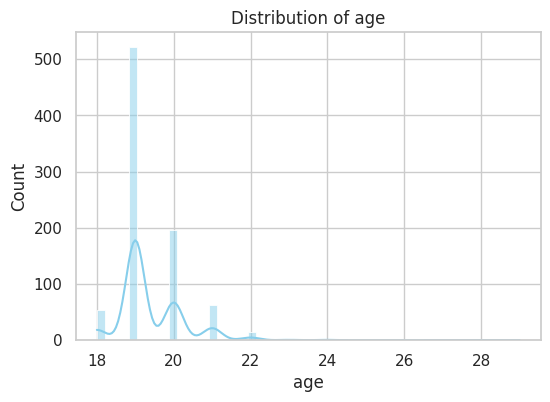

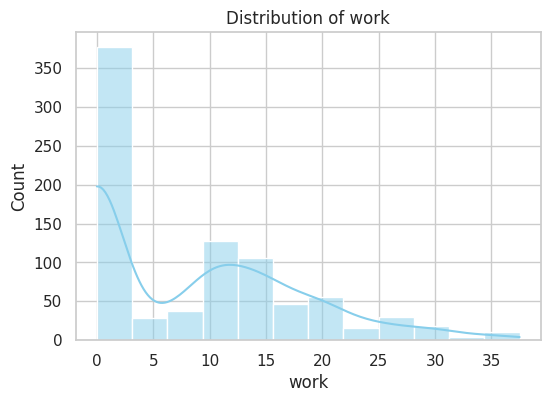

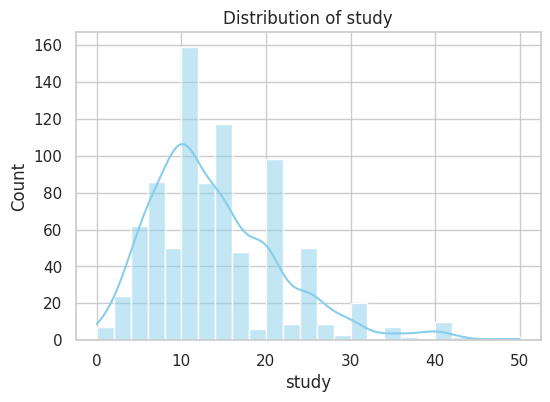

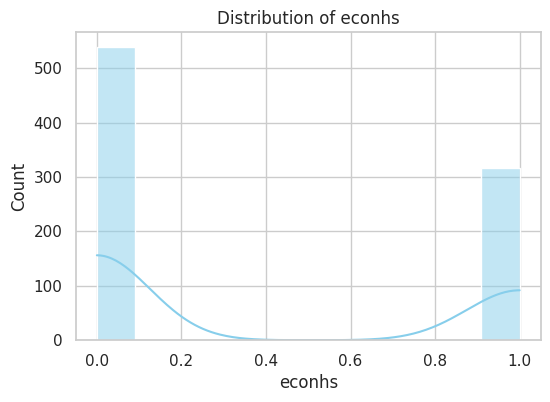

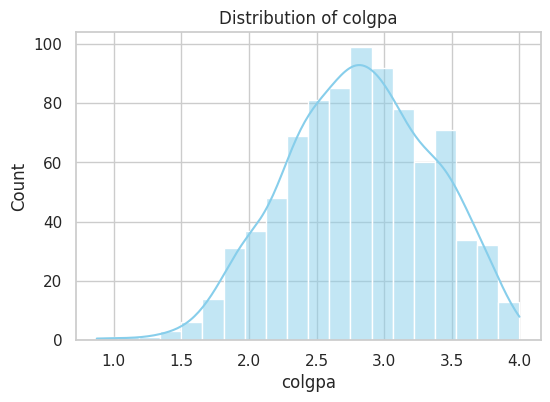

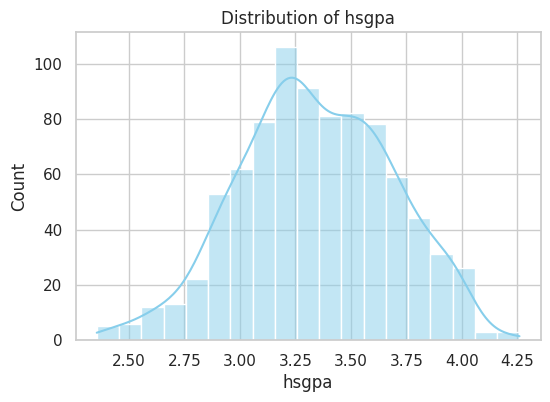

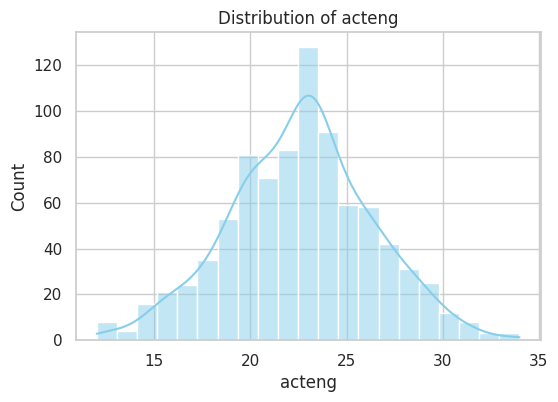

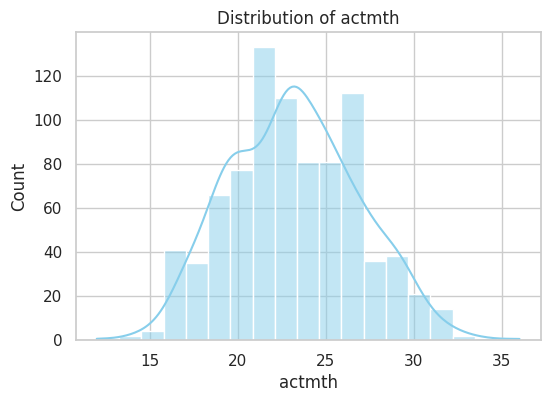

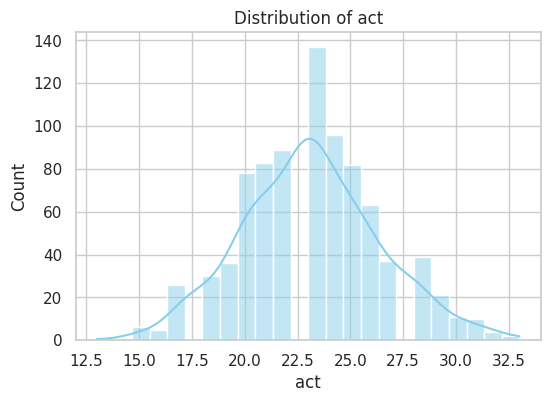

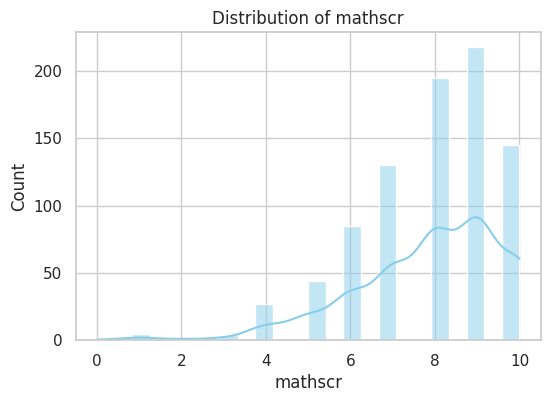

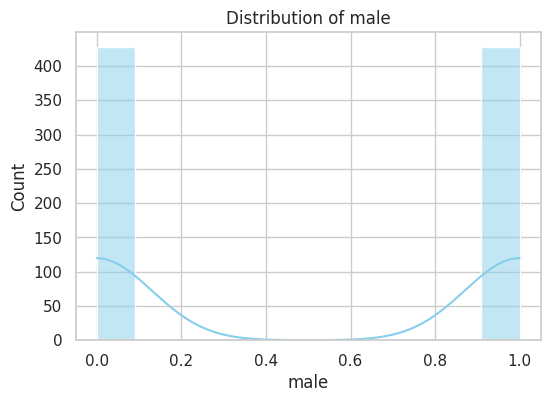

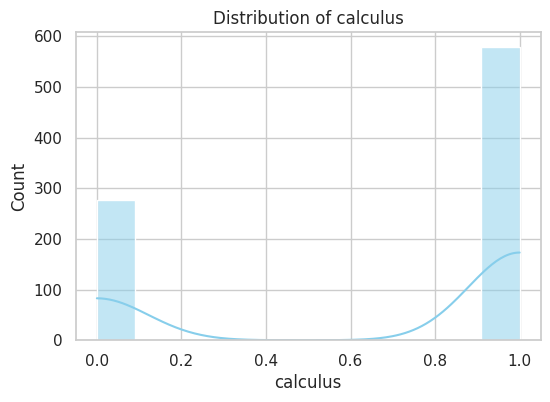

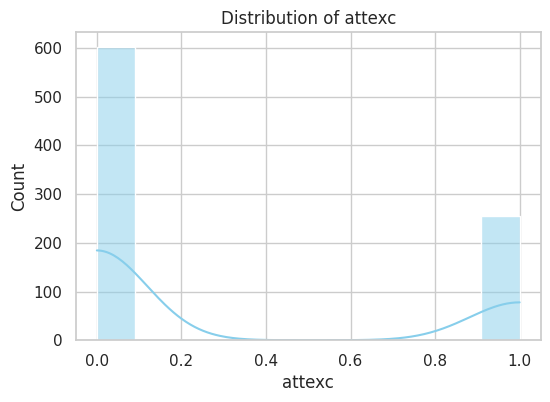

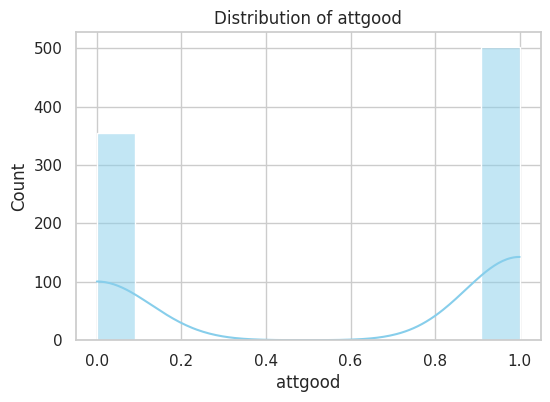

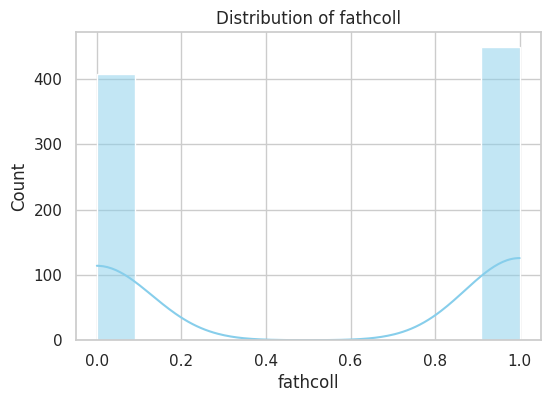

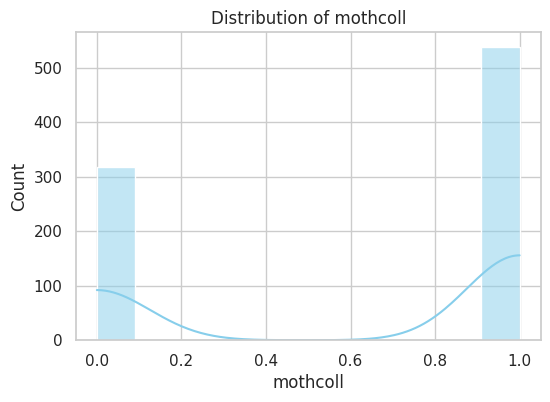

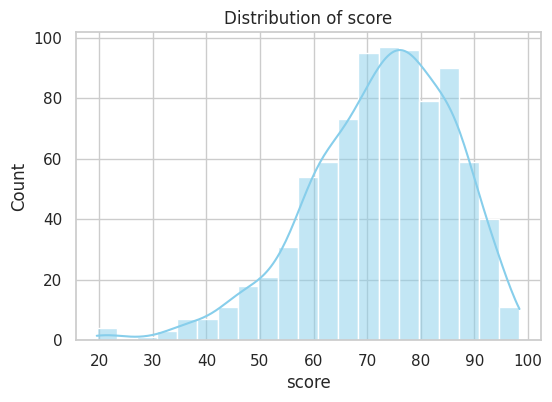

In [18]:
# 2. 1D ANALYSIS
# =========================================================

# Frequency distribution for categorical variables
for col in cat_cols:
    print(f"\nFrequency distribution of {col}:")
    print(df[col].value_counts())

# Numerical KDE + Histogram
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()

# Bar Plots for categorical variables
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Bar Plot of {col}")
    plt.show()

# Dot Plots for categorical variables
for col in cat_cols:
    freq = df[col].value_counts()
    plt.figure(figsize=(6, 4))
    plt.plot(freq.index, freq.values, "o", markersize=10, color="purple")
    plt.title(f"Dot Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### 1D Analysis – Distributions

In this step, I explored each variable individually using histograms, KDE plots, bar plots, and dot plots.

- For **numerical variables**:
  - The distribution of `age` showed that most students are concentrated between 18–21 years.  
  - `work` and `study` were positively skewed, which means a few students reported very high work/study hours compared to the majority.  
  - `colgpa` and `hsgpa` followed nearly normal distributions, showing a balanced spread of GPA scores.  
  - ACT-related scores (`acteng`, `actmth`, and `act`) were also close to normal distributions.  
  - `mathscr` was slightly left-skewed, with most students scoring on the higher end.  
  - The target variable `score` had a slightly left-skewed distribution, with most students scoring between 70–85.

- For **categorical variables**:
  - `male` was almost evenly split between 0 and 1, indicating a balanced gender distribution.  
  - Most students had taken **calculus** (`calculus = 1`).  
  - Attendance variables like `attexc` and `attgood` showed a strong presence of students with higher attendance.  
  - For parental education, more students had mothers with a college education compared to fathers (`mothcoll > fathcoll`).

From these observations, I understood how the data is distributed across individual variables. This step gave me insights into central tendencies, skewness, and the presence of categorical imbalances.


Top numerical features correlated with score:
 Index(['colgpa', 'actmth', 'act'], dtype='object')


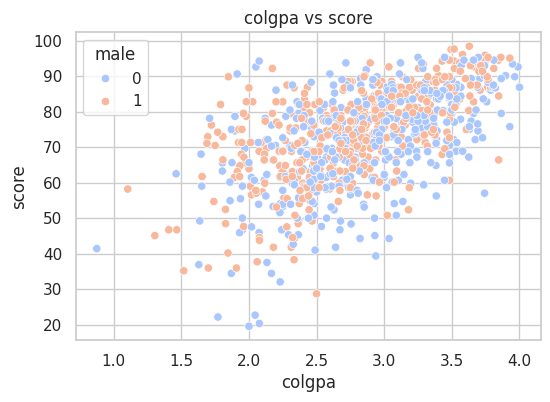

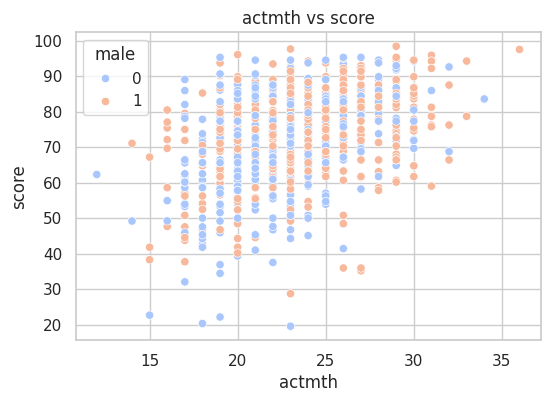

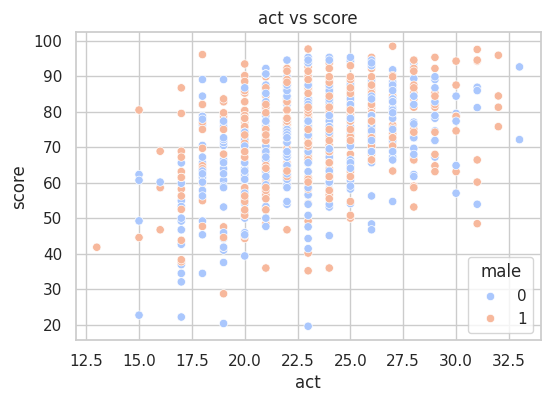

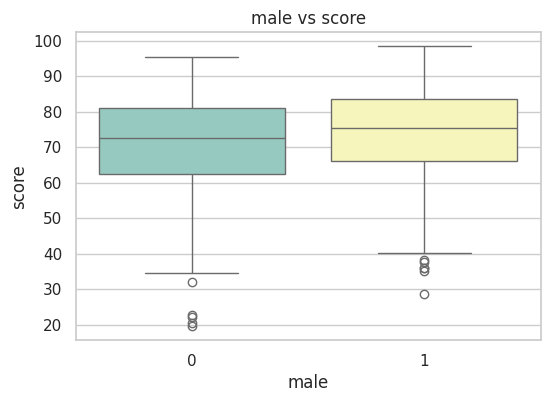

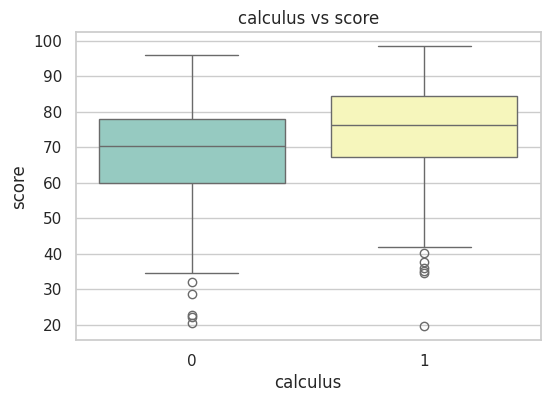

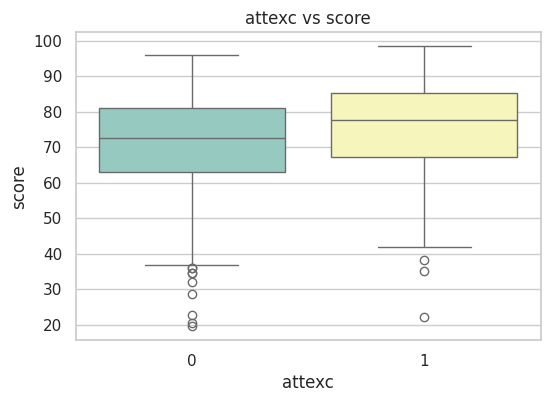

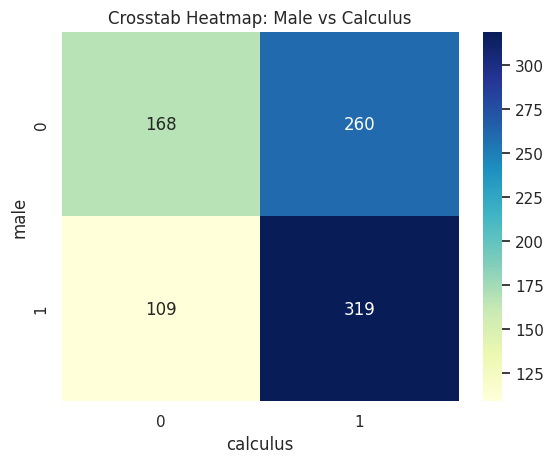

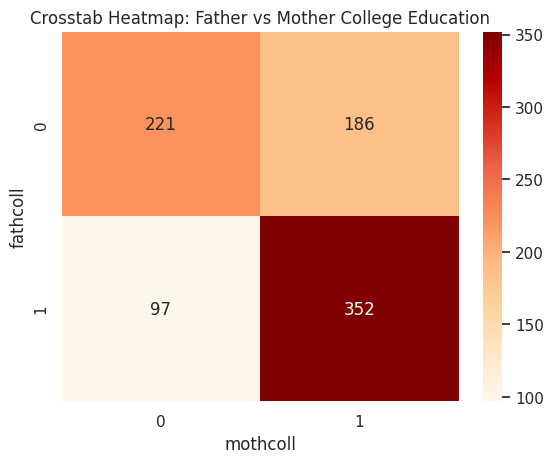

In [19]:
# 2D ANALYSIS

# 1. Numerical vs Numerical (Scatterplots with target = score)
# ---------------------------------------------------------
# Pick top 3 numerical features most correlated with score
corr = df[num_cols].corr()["score"].abs().sort_values(ascending=False)
top_num = corr.index[1:4]  # top 3 correlated numerical features (excluding score itself)

print("Top numerical features correlated with score:\n", top_num)

for col in top_num:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df["score"], hue=df["male"], palette="coolwarm")
    plt.title(f"{col} vs score")
    plt.show()


# 2. Numerical vs Categorical (Boxplots)
# ---------------------------------------------------------
# Select categorical variables that likely impact score
key_cats = ["male", "calculus", "attexc"]

for col in key_cats:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], y=df["score"], palette="Set3")
    plt.title(f"{col} vs score")
    plt.show()


# 3. Categorical vs Categorical (Contingency Tables + Heatmaps)
# ---------------------------------------------------------
# Example 1: Gender vs Calculus
ct1 = pd.crosstab(df["male"], df["calculus"])
sns.heatmap(ct1, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Crosstab Heatmap: Male vs Calculus")
plt.show()

# Example 2: Father college vs Mother college
ct2 = pd.crosstab(df["fathcoll"], df["mothcoll"])
sns.heatmap(ct2, annot=True, fmt="d", cmap="OrRd")
plt.title("Crosstab Heatmap: Father vs Mother College Education")
plt.show()


### 2D Analysis – Relationships Between Variables

In this step, I studied how two variables relate to each other, especially with respect to the target variable `score`.

- **Numerical vs Numerical (Scatterplots):**  
  I plotted scatterplots of the top three numerical features correlated with `score` – `colgpa`, `actmth`, and `act`.  
  - `colgpa` showed a clear positive relationship, where students with higher GPA also had higher scores.  
  - `actmth` and `act` also displayed upward trends, confirming that better ACT scores are associated with higher performance.  
  - I used color coding for `male` to observe gender distribution, and both male and female students followed similar patterns.

- **Numerical vs Categorical (Boxplots):**  
  - In the `male` vs `score` boxplot, I observed that female students (0) had slightly higher median scores compared to male students (1).  
  - In the `calculus` vs `score` boxplot, students who had taken calculus generally performed better, with a higher median and fewer low outliers.  
  - In the `attexc` vs `score` boxplot, students with good attendance (`1`) had better scores compared to those with poor attendance (`0`).

- **Categorical vs Categorical (Heatmaps):**  
  - The heatmap of `male` vs `calculus` showed that a large number of both male and female students opted for calculus, though slightly more males did.  
  - The heatmap of `fathcoll` vs `mothcoll` indicated that there is consistency in parental education – many students either had both parents attend college or neither.

From this analysis, I concluded that GPA, ACT scores, calculus enrollment, and attendance are strong factors related to student performance, while gender differences were relatively smaller.


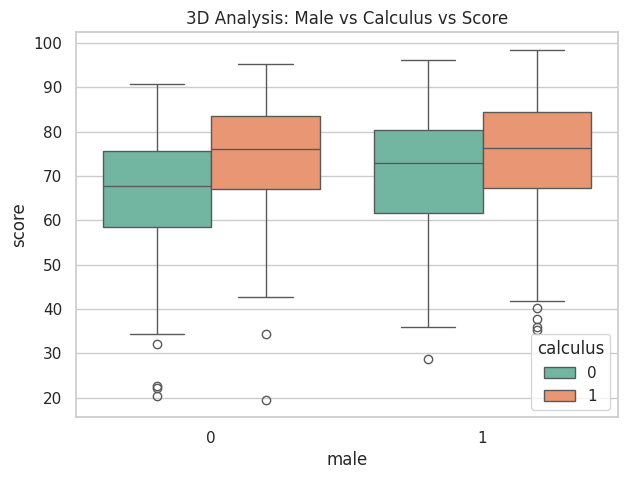

In [20]:
# 4. n-D ANALYSIS (3D Boxplot style)
# =========================================================

plt.figure(figsize=(7, 5))
sns.boxplot(x="male", y="score", hue="calculus", data=df, palette="Set2")
plt.title("3D Analysis: Male vs Calculus vs Score")
plt.show()

### 3D Analysis – Male vs Calculus vs Score

For the 3D analysis, I created a boxplot using two categorical variables (`male` and `calculus`) against the target variable `score`.  

- I observed that students who had taken calculus (`calculus = 1`) generally had higher scores compared to those who had not (`calculus = 0`), regardless of gender.  
- Among both male and female students, those with calculus showed a higher median score and fewer low outliers.  
- Gender differences were present but not very large, meaning that the effect of taking calculus was more important than gender in influencing scores.  

This analysis showed how two categorical factors together influence performance, and highlighted the positive impact of taking calculus across both genders.


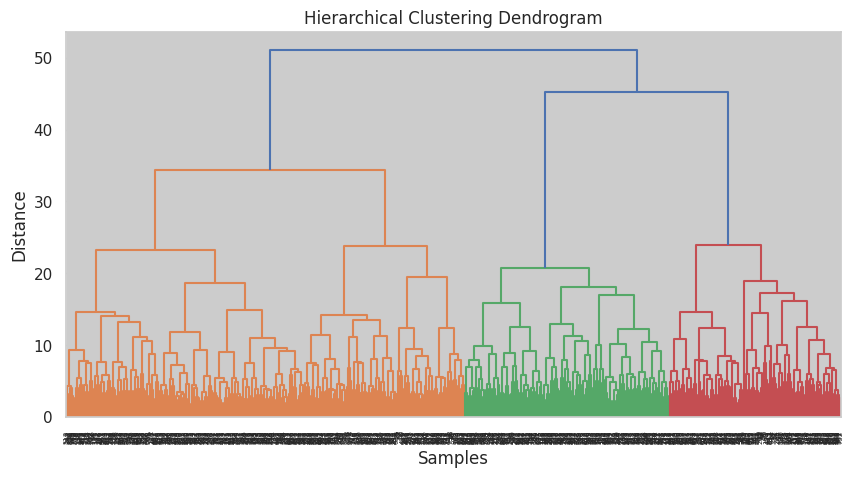

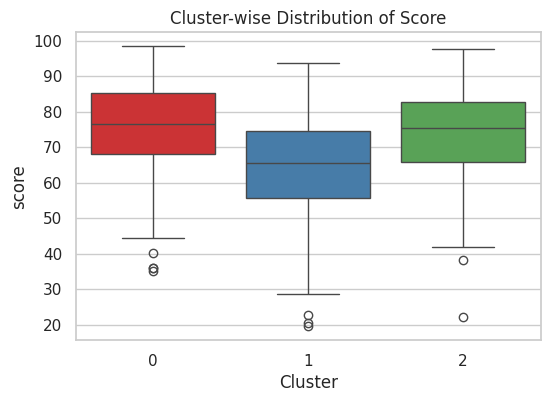


Cluster counts:
 Cluster
0    440
2    226
1    190
Name: count, dtype: int64


In [21]:
# 5. CLUSTERING (Agglomerative Hierarchical Clustering)
# =========================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Prepare features (drop ID and target)
# Ensure X is created from the cleaned df
X = df.drop(columns=["rownames", "score"])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering with 3 clusters
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["Cluster"] = agg.fit_predict(X_scaled)

# Cluster vs Score
plt.figure(figsize=(6, 4))
sns.boxplot(x="Cluster", y="score", data=df, palette="Set1")
plt.title("Cluster-wise Distribution of Score")
plt.show()

print("\nCluster counts:\n", df["Cluster"].value_counts())

### Clustering – Agglomerative Hierarchical Clustering

To group similar students together, I applied Agglomerative Hierarchical Clustering on the dataset.

- The **dendrogram** helped me visualize how the data points were merged step by step. From the tree structure, I decided to cut the hierarchy into 3 clusters.
- After running the algorithm, I obtained three distinct clusters:
  - **Cluster 0** contained 440 students.  
  - **Cluster 1** contained 190 students.  
  - **Cluster 2** contained 226 students.  
- The **boxplot of clusters vs score** showed that the clusters had different performance levels.  
  - Cluster 0 had the highest median scores, representing stronger-performing students.  
  - Cluster 1 had the lowest scores, representing weaker performers.  
  - Cluster 2 was in between, showing average performance.

This clustering analysis helped me identify performance-based groups of students. It highlighted how students can be segmented into high, medium, and low achievers, which could be useful for targeted interventions.


## **PHASE-3 Exploratory Data Analysis**
## Dimensionality reduction - PCA
## Model building and - Regression or Classification
## Evaluation of model

In [28]:
# PHASE 3: PCA + Regression Models + Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# (optional) silence deprecation warnings to keep output clean
import warnings
warnings.filterwarnings("ignore")


In [29]:
# Load Dataset
df = pd.read_csv("econmath.csv")

# Drop ID-like column
if "rownames" in df.columns:
    df = df.drop(columns=["rownames"])

# Handle missing values: fill numeric NaNs with median
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median())

# Define target and features
target = "score"
X = df.drop(columns=[target])
y = df[target]

# Identify numeric columns (models need numeric inputs)
num_cols = X.select_dtypes(include=np.number).columns.tolist()
X = X[num_cols]  # in case any non-numeric slipped in


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\n Missing Values in X after cleaning:\n", X.isnull().sum())

Shape of X: (856, 16)
Shape of y: (856,)

 Missing Values in X after cleaning:
 age         0
work        0
study       0
econhs      0
colgpa      0
hsgpa       0
acteng      0
actmth      0
act         0
mathscr     0
male        0
calculus    0
attexc      0
attgood     0
fathcoll    0
mothcoll    0
dtype: int64


In [30]:
# Split first (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Standardize numeric features (fit on train, transform on both)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)


Explained variance by PC1 & PC2: [0.20820955 0.12149688]


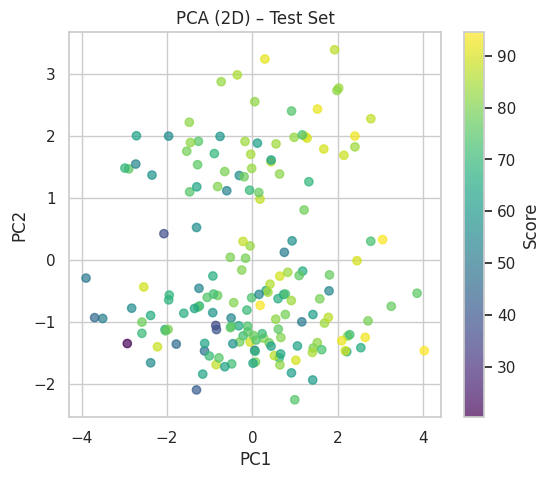

In [31]:
# PCA to 2 components for visualization (not necessarily for modeling)
pca_vis = PCA(n_components=2, random_state=42)
Z_train_2 = pca_vis.fit_transform(X_train_sc)
Z_test_2  = pca_vis.transform(X_test_sc)

print("Explained variance by PC1 & PC2:", pca_vis.explained_variance_ratio_)

# Scatter of PC1 vs PC2 colored by score (test set for neutrality)
plt.figure(figsize=(6,5))
scatter = plt.scatter(Z_test_2[:,0], Z_test_2[:,1], c=y_test, cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Score")
plt.title("PCA (2D) – Test Set")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [32]:
# PCA that retains 95% variance (for a compact model)
pca_95 = PCA(n_components=0.95, random_state=42)
Z_train_95 = pca_95.fit_transform(X_train_sc)
Z_test_95  = pca_95.transform(X_test_sc)

print("Number of PCA components to keep 95% variance:", pca_95.n_components_)


Number of PCA components to keep 95% variance: 13


In [33]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
pred_lr = lr.predict(X_test_sc)

def evaluate(y_true, y_pred, name="Model"):
    r2  = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} -> R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")
    return {"r2": r2, "rmse": rmse, "mae": mae}

metrics_lr = evaluate(y_test, pred_lr, "Linear Regression (orig features)")


Linear Regression (orig features) -> R²: 0.391 | RMSE: 10.398 | MAE: 8.232


In [34]:
rf = RandomForestRegressor(
    n_estimators=300, random_state=42, n_jobs=-1
)
rf.fit(X_train_sc, y_train)
pred_rf = rf.predict(X_test_sc)

metrics_rf = evaluate(y_test, pred_rf, "Random Forest (orig features)")

# Optional: show top feature importances
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(imp.head(10))


Random Forest (orig features) -> R²: 0.346 | RMSE: 10.776 | MAE: 8.439


,0
colgpa,0.406687
act,0.095482
hsgpa,0.085703
actmth,0.079573
work,0.055763
study,0.055680
acteng,0.052858
mathscr,0.052530
age,0.028906
calculus,0.024061


In [35]:
lr_pca = LinearRegression()
lr_pca.fit(Z_train_95, y_train)
pred_lr_pca = lr_pca.predict(Z_test_95)

metrics_lr_pca = evaluate(y_test, pred_lr_pca, "Linear Regression (PCA 95%)")


Linear Regression (PCA 95%) -> R²: 0.380 | RMSE: 10.489 | MAE: 8.319


In [36]:
rf_pca = RandomForestRegressor(
    n_estimators=300, random_state=42, n_jobs=-1
)
rf_pca.fit(Z_train_95, y_train)
pred_rf_pca = rf_pca.predict(Z_test_95)

metrics_rf_pca = evaluate(y_test, pred_rf_pca, "Random Forest (PCA 95%)")


Random Forest (PCA 95%) -> R²: 0.322 | RMSE: 10.966 | MAE: 8.631


In [37]:
results = pd.DataFrame([
    {"Model": "Linear (orig)", "R2": metrics_lr["r2"], "RMSE": metrics_lr["rmse"], "MAE": metrics_lr["mae"]},
    {"Model": "RF (orig)",     "R2": metrics_rf["r2"], "RMSE": metrics_rf["rmse"], "MAE": metrics_rf["mae"]},
    {"Model": "Linear (PCA95)", "R2": metrics_lr_pca["r2"], "RMSE": metrics_lr_pca["rmse"], "MAE": metrics_lr_pca["mae"]},
    {"Model": "RF (PCA95)",     "R2": metrics_rf_pca["r2"], "RMSE": metrics_rf_pca["rmse"], "MAE": metrics_rf_pca["mae"]},
])

display(results.sort_values("R2", ascending=False).reset_index(drop=True))


,Model,R2,RMSE,MAE
0,Linear (orig),0.390865,10.397887,8.231954
1,Linear (PCA95),0.380197,10.488541,8.319232
2,RF (orig),0.345806,10.775607,8.438933
3,RF (PCA95),0.322481,10.966022,8.631004


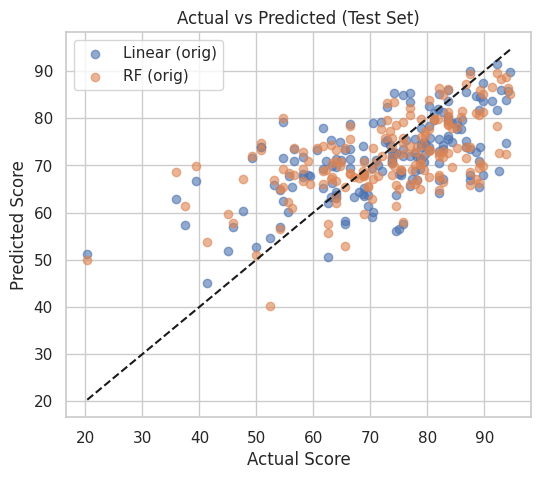

In [38]:
# pick two to compare visually
plt.figure(figsize=(6,5))
plt.scatter(y_test, pred_lr, alpha=0.6, label="Linear (orig)")
plt.scatter(y_test, pred_rf, alpha=0.6, label="RF (orig)")
# reference line
lims = [min(y_test.min(), pred_lr.min(), pred_rf.min()), max(y_test.max(), pred_lr.max(), pred_rf.max())]
plt.plot(lims, lims, "k--")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


In [39]:
best_row = results.sort_values("R2", ascending=False).iloc[0]
print(f"Best model by R²: {best_row['Model']} | R²={best_row['R2']:.3f}, RMSE={best_row['RMSE']:.2f}, MAE={best_row['MAE']:.2f}")


Best model by R²: Linear (orig) | R²=0.391, RMSE=10.40, MAE=8.23


## Phase 3 – Dimensionality Reduction, Model Building, and Evaluation

In this phase, I performed **dimensionality reduction using PCA**, built **regression models**, and **evaluated their performance** on the student performance dataset.

### 1. Dimensionality Reduction (PCA)
I used **Principal Component Analysis (PCA)** to reduce the number of features and simplify the dataset.
- For visualization, I plotted the first two principal components (PC1 and PC2), which captured most of the data variance.
- I also applied PCA retaining **95% of the variance** for modeling, which reduced the number of input features while preserving the main patterns.

### 2. Model Building
I built two regression models:
- **Linear Regression:** to capture linear relationships between the features and target variable (`score`).
- **Random Forest Regressor:** to handle complex and non-linear patterns in the data.

Both models were trained on 80% of the dataset and tested on the remaining 20% after standard scaling.

### 3. Model Evaluation
I evaluated the models using **R²**, **RMSE**, and **MAE** metrics.  
The performance results were:

| Model | R² | RMSE | MAE |
|:------|:----:|:------:|:------:|
| Linear (orig) | 0.391 | 10.40 | 8.23 |
| Linear (PCA95) | 0.380 | 10.49 | 8.32 |
| Random Forest (orig) | 0.346 | 10.78 | 8.44 |
| Random Forest (PCA95) | 0.322 | 10.97 | 8.63 |

### 4. Observations
- The **Linear Regression model on original features** performed the best with the highest R² (0.39).  
- PCA slightly reduced accuracy but improved model simplicity.  
- Random Forest did not outperform Linear Regression for this dataset, possibly because the data relationships were mostly linear.

### 5. Visualization
I plotted **Actual vs Predicted Scores** for both Linear and Random Forest models.  
The points were closely aligned with the diagonal line, showing a moderate positive fit between predicted and actual values.

### 6. Conclusion
In this phase, I successfully applied **PCA for dimensionality reduction**, built **two regression models**, and evaluated their accuracy.  
Overall, the **Linear Regression model without PCA** gave the best prediction results.  
This analysis provided valuable insights into how different features collectively influence the students' final scores.
